In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
file_path = '/content/winequalityN.csv'
df = pd.read_csv("/content/winequalityN.csv")

In [ ]:
print(df.head())
print(df.info())
print(df.describe())

    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.4

In [ ]:
df = df.dropna()

In [ ]:
X = df.drop('quality', axis=1)  # Features
y = df['quality']  # Target

In [ ]:
X = pd.get_dummies(X, columns=['type'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [ ]:
print("Decision Tree Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))


Decision Tree Performance
Accuracy: 0.5796802475502837
Confusion Matrix:
 [[  0   2   2   2   1   0   0]
 [  1  11  30  14   5   2   0]
 [  4  35 412 173  26   2   0]
 [  5  23 156 508 113  19   4]
 [  0   2  16 124 175   9   1]
 [  0   1   5  20  17  18   0]
 [  0   0   0   1   0   0   0]]
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.15      0.17      0.16        63
           5       0.66      0.63      0.65       652
           6       0.60      0.61      0.61       828
           7       0.52      0.54      0.53       327
           8       0.36      0.30      0.32        61
           9       0.00      0.00      0.00         1

    accuracy                           0.58      1939
   macro avg       0.33      0.32      0.32      1939
weighted avg       0.58      0.58      0.58      1939



In [ ]:
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [ ]:
print("\nLogistic Regression Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))



Logistic Regression Performance
Accuracy: 0.5466735430634347
Confusion Matrix:
 [[  0   2   3   2   0   0   0]
 [  0   5  36  21   1   0   0]
 [  0   4 368 278   2   0   0]
 [  0   0 168 604  56   0   0]
 [  0   0  14 230  83   0   0]
 [  0   0   0  40  21   0   0]
 [  0   0   0   0   1   0   0]]
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.45      0.08      0.14        63
           5       0.62      0.56      0.59       652
           6       0.51      0.73      0.60       828
           7       0.51      0.25      0.34       327
           8       0.00      0.00      0.00        61
           9       0.00      0.00      0.00         1

    accuracy                           0.55      1939
   macro avg       0.30      0.23      0.24      1939
weighted avg       0.53      0.55      0.52      1939



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

In [ ]:
print("\nNaive Bayes Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))


Naive Bayes Performance
Accuracy: 0.27643115007735947
Confusion Matrix:
 [[  0   3   3   0   1   0   0]
 [  2   6  27  14   4   0  10]
 [  7  12 265 183  20   2 163]
 [  1   7 180 219  75   7 339]
 [  2   2  28  54  43   7 191]
 [  0   0   2   7  11   2  39]
 [  0   0   0   0   0   0   1]]
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.20      0.10      0.13        63
           5       0.52      0.41      0.46       652
           6       0.46      0.26      0.34       828
           7       0.28      0.13      0.18       327
           8       0.11      0.03      0.05        61
           9       0.00      1.00      0.00         1

    accuracy                           0.28      1939
   macro avg       0.23      0.28      0.16      1939
weighted avg       0.43      0.28      0.33      1939



In [ ]:
models = ['Decision Tree', 'Logistic Regression', 'Naive Bayes']
accuracies = [accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_nb)]

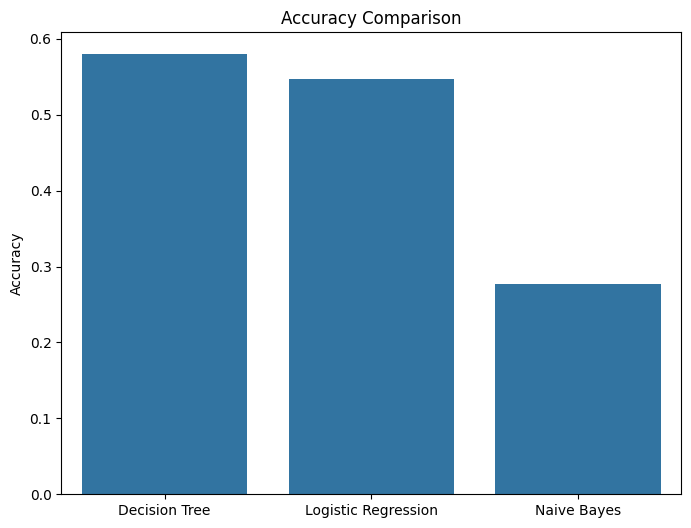

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=accuracies)
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()